In [1]:
import pandas as pd

dev = False  # Set to false when using production version of library
if dev:
    # Path to Dev version of autots library
    sys.path.append(os.environ['DEV_AUTOTS'])
    %load_ext autoreload
    %autoreload 2

from auto_ts import auto_timeseries

Imported auto_timeseries version:0.0.32. Call by using:
model = auto_timeseries(score_type='rmse',
                time_interval='M',
                non_seasonal_pdq=None, seasonality=False, seasonal_period=12,
                model_type=['best'],
                verbose=2)
model.fit(traindata, ts_column,target)
model.predict(testdata, model='best')



# Load Dataset

In [2]:
datapath = '../example_datasets/'
filename1 = 'Sales_and_Marketing.csv'
dataset = pd.read_csv(datapath+filename1, index_col=None)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Time Period        48 non-null     object 
 1   Sales              48 non-null     int64  
 2   Marketing Expense  48 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.2+ KB


In [3]:
dataset.head()

,Time Period,Sales,Marketing Expense
0,2011-01-01,397,486.64
1,2011-02-01,400,501.80
2,2011-03-01,498,437.09
3,2011-04-01,536,565.16
4,2011-05-01,596,744.15


<AxesSubplot:>

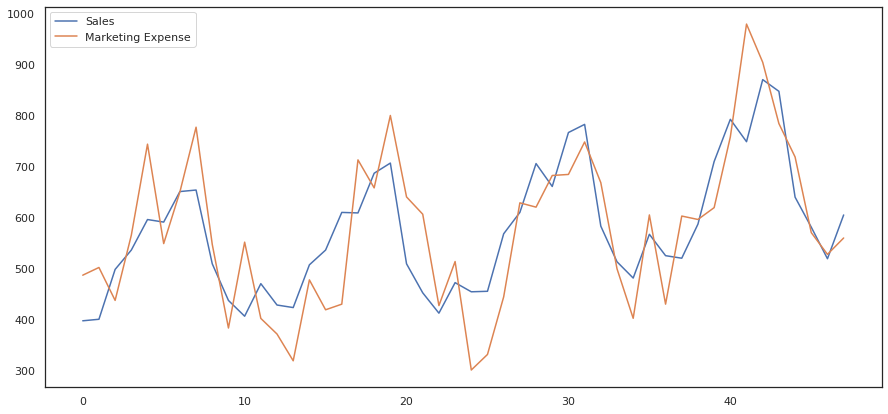

In [4]:
dataset[['Sales', 'Marketing Expense']].plot(figsize=(15,7))

# Train Model

In [5]:
ts_column = 'Time Period'
target = 'Sales'
sep = ','

In [6]:
FORECAST_PERIOD = 3

In [7]:
train = dataset[:-FORECAST_PERIOD]
test = dataset[-FORECAST_PERIOD:]
print(train.shape, test.shape)

(45, 3) (3, 3)


In [8]:
model = auto_timeseries(
    score_type='rmse',
    model_type='best', verbose=0
)        

Start of Fit.....
Running Augmented Dickey-Fuller test with paramters:
    maxlag: 2 regression: c autolag: None
Results of Augmented Dickey-Fuller Test:
+-----------------------------+------------------------------+
|                             | Dickey-Fuller Augmented Test |
+-----------------------------+------------------------------+
|        Test Statistic       |       -2.9756149283863       |
|           p-value           |     0.03723526746722655      |
|          #Lags Used         |             2.0              |
| Number of Observations Used |             42.0             |
|     Critical Value (1%)     |      -3.596635636000432      |
|     Critical Value (5%)     |      -2.933297331821618      |
|     Critical Value (10%)    |     -2.6049909750566895      |
+-----------------------------+------------------------------+
 this series is stationary
    Target variable given as = Sales
Start of loading of data.....
Input is data frame. Performing Time Series Analysis
ts_col

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


  Starting Prophet Fit
      No seasonality assumed since seasonality flag is set to False
  End of Prophet Fit
  Starting Prophet Cross Validation
Max. iterations using expanding window cross validation = 3

Fold Number: 1 --> Train Shape: 12 Test Shape: 11
    RMSE = 100.04
    Std Deviation of Originals = 105.48
    Normalized RMSE = 95%
Cross Validation window: 1 completed

Fold Number: 2 --> Train Shape: 23 Test Shape: 11
    RMSE = 117.26
    Std Deviation of Originals = 119.99
    Normalized RMSE = 98%
Cross Validation window: 2 completed

Fold Number: 3 --> Train Shape: 34 Test Shape: 11
    RMSE = 36.16
    Std Deviation of Originals = 138.61
    Normalized RMSE = 26%
Cross Validation window: 3 completed
Average CV RMSE over 3 windows (macro) = 84.48489
Average CV RMSE of all predictions (micro) = 91.40517
  End of Prophet Cross Validation
Time Taken = 4 seconds
---------------------------
Final Prophet CV results:
---------------------------
    RMSE = 91.41
    Std Deviation

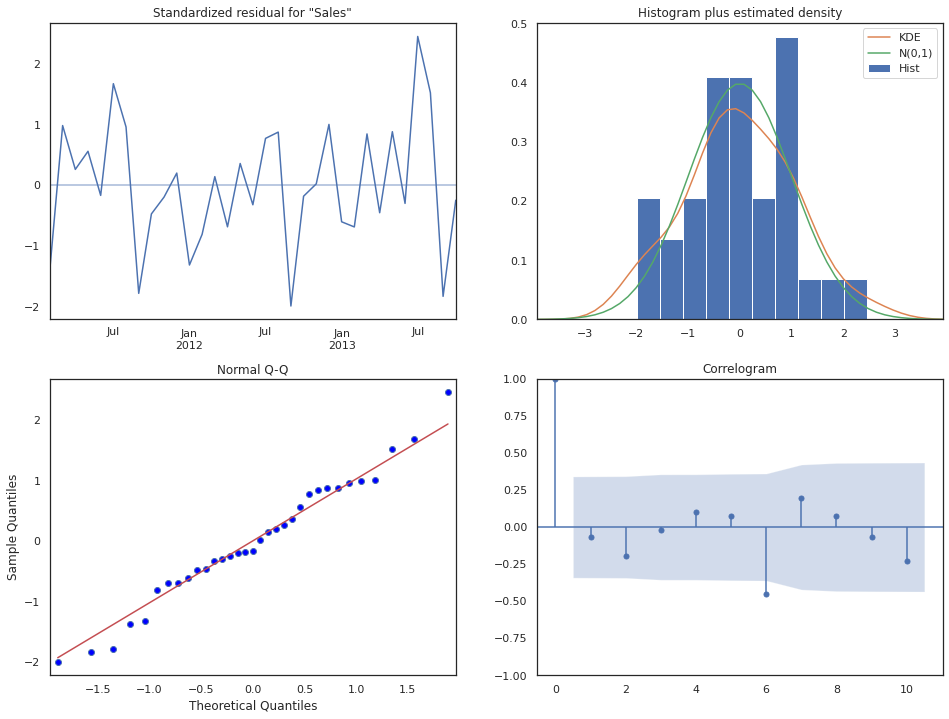

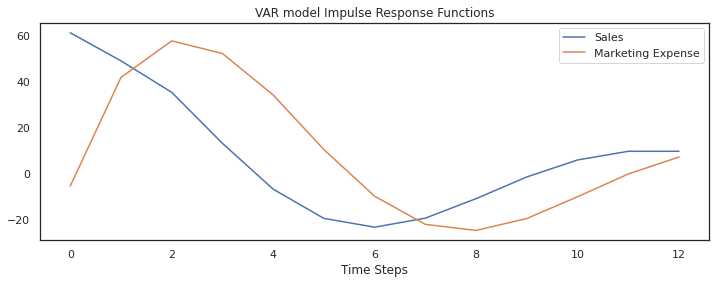

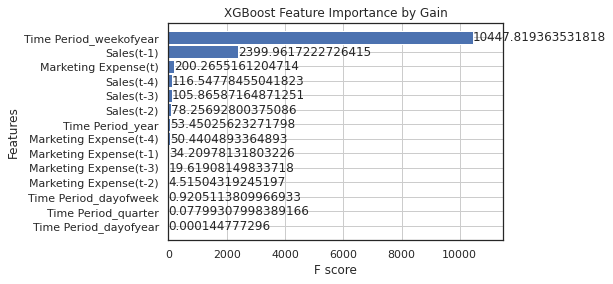

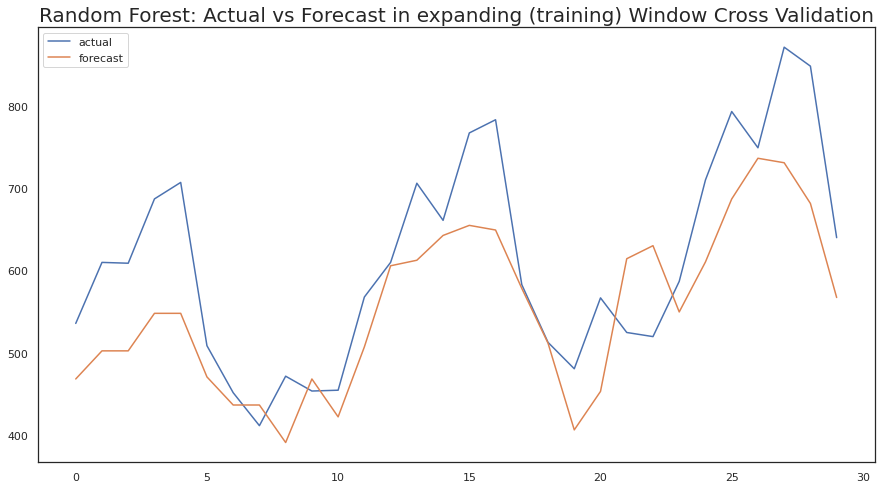

In [9]:
model.fit(
    traindata=train,
    ts_column=ts_column,
    target=target,
    cv=3,
    sep=sep)        

# Evaluate Results

In [10]:
model.get_leaderboard()

,name,rmse
0,Prophet,84.484892
3,ML,88.166254
1,auto_SARIMAX,89.580371
2,VAR,130.762623


<AxesSubplot:xlabel='Model', ylabel='CV Scores'>

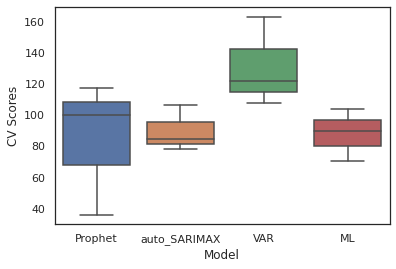

In [11]:
model.plot_cv_scores()

In [12]:
# make sure all models have the same number of CV folds
model.get_cv_scores()

,Model,CV Scores
0,Prophet,100.041830
1,Prophet,117.256366
2,Prophet,36.156479
3,auto_SARIMAX,77.881028
4,auto_SARIMAX,84.438267
5,auto_SARIMAX,106.421820
6,VAR,107.685422
7,VAR,121.592767
8,VAR,163.009679
9,ML,89.878521


In [13]:
results_dict = model.get_ml_dict()

In [14]:
results_dict['Prophet']['forecast'] 

12    523.340489
13    525.114460
14    526.773982
15    528.547953
16    530.264699
17    532.038670
18    533.755416
19    535.529388
20    537.303359
21    539.020105
22    540.794076
23    548.628427
24    550.822304
25    553.016181
26    554.997748
27    557.191624
28    559.314731
29    561.508608
30    563.631715
31    565.825592
32    568.019469
33    570.142575
34    508.451968
35    576.128779
36    523.569955
37    527.984786
38    633.988374
39    701.471736
40    762.835841
41    765.728677
42    813.260698
43    801.643357
44    707.263103
Name: yhat, dtype: float64

In [15]:
results_dict['auto_SARIMAX']['forecast']

[array([511.21507465, 488.23263144, 540.73619523, 518.50206239,
        521.24411128, 619.33840067, 599.75613783, 649.06510934,
        593.14989577, 581.22273329, 518.59968721]),
 array([560.85477704, 481.9279608 , 489.68926249, 527.34253426,
        590.60942131, 586.98603552, 608.24828536, 608.70128426,
        630.7758915 , 602.80839294, 543.82881951]),
 array([521.99571313, 588.08677138, 524.13505696, 582.66340671,
        579.22966497, 586.6481609 , 634.61992151, 711.63809465,
        685.33393363, 643.26974884, 620.34522835])]

In [16]:
results_dict['VAR']['forecast'] 

[Sales             yhat     mean_se  mean_ci_lower  mean_ci_upper
 2012-01-01  524.648603   65.168592     396.920510     652.376695
 2012-02-01  546.271543   92.216800     365.529936     727.013150
 2012-03-01  545.457995   99.247598     350.936277     739.979713
 2012-04-01  533.342669   99.474902     338.375443     728.309895
 2012-05-01  519.458170  100.226374     323.018086     715.898253
 2012-06-01  512.536808  101.449064     313.700298     711.373319
 2012-07-01  512.035671  101.932761     312.251131     711.820211
 2012-08-01  514.167503  101.978330     314.293650     714.041356
 2012-09-01  517.276508  101.995432     317.369136     717.183881
 2012-10-01  519.432240  102.059714     319.398877     719.465604
 2012-11-01  519.792772  102.093999     319.692210     719.893333,
 Sales             yhat    mean_se  mean_ci_lower  mean_ci_upper
 2012-12-01  412.282568  56.341358     301.855536     522.709600
 2013-01-01  437.340329  71.625175     296.957566     577.723092
 2013-02-01 

In [17]:
results_dict['ML']['forecast'] # This has CV implemented, but currently does not return the forecast values from the CV (maybe a future enhancement)

[]

# Forecast Results

In [18]:
# Actual Test
test

,Time Period,Sales,Marketing Expense
45,2014-10-01,581,570.30
46,2014-11-01,519,527.60
47,2014-12-01,605,559.75


In [19]:
# Using Best Model
future_predictions = model.predict(
    testdata=test.drop(columns=target),
)  
future_predictions

Building Forecast dataframe. Forecast Period = 3


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Marketing Expense,Marketing Expense_lower,Marketing Expense_upper,additive_terms,...,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-10-01,689.914383,583.735744,619.015960,689.859727,689.970408,-0.207675,-0.207675,-0.207675,-88.592296,...,-0.207675,-0.207675,-0.207675,-88.384621,-88.384621,-88.384621,0.0,0.0,0.0,601.322087
1,2014-11-01,696.096979,548.196109,585.979511,695.857238,696.330368,-1.472682,-1.472682,-1.472682,-128.710073,...,-1.472682,-1.472682,-1.472682,-127.237391,-127.237391,-127.237391,0.0,0.0,0.0,567.386905
2,2014-12-01,702.080135,622.283789,657.345989,701.526952,702.613282,-0.520223,-0.520223,-0.520223,-61.923930,...,-0.520223,-0.520223,-0.520223,-61.403706,-61.403706,-61.403706,0.0,0.0,0.0,640.156206


In [20]:
# Using specific model
future_predictions = model.predict(
    testdata=test.drop(columns=target),
    model='ML'
)
future_predictions

For large datasets: ML predictions will take time since it has to predict each row and use that for future predictions...
    ML predictions completed


,yhat,mean_se,mean_ci_lower,mean_ci_upper
Time Period,,,,
2014-10-01,502.910400,NaN,NaN,NaN
2014-11-01,452.436432,NaN,NaN,NaN
2014-12-01,461.097107,NaN,NaN,NaN


In [21]:
# Using specific model
future_predictions = model.predict(
    testdata=test.drop(columns=target),
    model='Prophet'
)
future_predictions

Building Forecast dataframe. Forecast Period = 3


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Marketing Expense,Marketing Expense_lower,Marketing Expense_upper,additive_terms,...,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-10-01,689.914383,583.844383,618.700153,689.848768,689.975519,-0.207675,-0.207675,-0.207675,-88.592296,...,-0.207675,-0.207675,-0.207675,-88.384621,-88.384621,-88.384621,0.0,0.0,0.0,601.322087
1,2014-11-01,696.096979,549.413903,586.032986,695.839650,696.388543,-1.472682,-1.472682,-1.472682,-128.710073,...,-1.472682,-1.472682,-1.472682,-127.237391,-127.237391,-127.237391,0.0,0.0,0.0,567.386905
2,2014-12-01,702.080135,622.992945,658.602780,701.535030,702.653124,-0.520223,-0.520223,-0.520223,-61.923930,...,-0.520223,-0.520223,-0.520223,-61.403706,-61.403706,-61.403706,0.0,0.0,0.0,640.156206


In [22]:
# Using specific model
future_predictions = model.predict(
    testdata=test.drop(columns=target),
    model='auto_SARIMAX'
)
future_predictions

Sales,yhat,mean_se,mean_ci_lower,mean_ci_upper
2014-10-01,614.597578,62.887027,491.341270,737.853885
2014-11-01,613.551524,68.730238,478.842732,748.260315
2014-12-01,633.869956,69.809761,497.045339,770.694573


In [23]:
# Using specific model
future_predictions = model.predict(
    testdata=test.drop(columns=target),
    model='VAR'
)
future_predictions

Sales,yhat,mean_se,mean_ci_lower,mean_ci_upper
2014-10-01,545.803257,69.209395,410.155336,681.451177
2014-11-01,494.264366,93.618823,310.774844,677.753889
2014-12-01,466.375274,107.357804,255.957845,676.792703
